In [2]:
import os, sys, re #file handling and regex ops
import time #to measure execution time
import numpy as np #num ops
import pandas as pd #data manipulation & analysis
import matplotlib.pyplot as plt #plotting
from sklearn.model_selection import train_test_split #split data
from sklearn.preprocessing import MinMaxScaler #scaler to normalize feature values
from sklearn.decomposition import PCA #PCA for dimensionality reduction
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.metrics import classification_report #for performance eval
from sklearn.metrics import roc_curve, auc #roc curve and auc



# Load the csv file and fill Nan/empty values as 0
dataset = pd.read_csv('loan.csv', low_memory=False)
df = dataset.fillna(0)

# We will be using only two classes and group them as below
def LoanResult(status):
    if (status == 'Fully Paid') or (status == 'Current'):
        return 1 #good loan
    else:
        return 0 #bad loan

df['loan_status'] = df['loan_status'].apply(LoanResult)

# Set of features which indicate the dimensionality of the data
df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]

#For simplicity, in this question, we select all columns that do not contain integer of float type of data. Then, one hot encoding is performed.
df_cat = df.select_dtypes(exclude=['int64', 'float64'])
df = pd.get_dummies(df, df_cat.columns.values)

df.shape

# We select the `loan_status` column as the target column.  

print("Shape of dataset after one-hot encoding:", df.shape) #print shape of dataset after 1 hot encoding
print("Unique values in loan_status:", df["loan_status"].unique()) #check unique values in loan status to  ensure it contains only 1 and 0s

df.head()

Shape of dataset after one-hot encoding: (226067, 161)
Unique values in loan_status: [1 0]


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,...,last_pymnt_d_Feb-2019,last_pymnt_d_Jan-2019,last_pymnt_d_Jul-2018,last_pymnt_d_Nov-2018,last_pymnt_d_Oct-2018,last_pymnt_d_Sep-2018,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
0,2500,2500,2500.0,13.56,84.92,55000.0,1,18.24,9.0,1.0,...,True,False,False,False,False,False,True,False,True,False
1,30000,30000,30000.0,18.94,777.23,90000.0,1,26.52,13.0,1.0,...,True,False,False,False,False,False,True,False,True,False
2,5000,5000,5000.0,17.97,180.69,59280.0,1,10.51,8.0,0.0,...,True,False,False,False,False,False,True,False,True,False
3,4000,4000,4000.0,18.94,146.51,92000.0,1,16.74,10.0,0.0,...,True,False,False,False,False,False,True,False,True,False
4,30000,30000,30000.0,16.14,731.78,57250.0,1,26.35,12.0,0.0,...,True,False,False,False,False,False,True,False,True,False


In [4]:
#define y & x (target & features)
y = df["loan_status"] #target var
x = df.drop(columns=["loan_status"]) #features (dropping the target)

#verify that we have exactly 160 features
print("Final num of features in X:", x.shape[1]) #print the 160

#split data insto training/testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = .25, random_state = 10)

#print shapes of the train/test sets
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

#apply min/max scaling to normalize features
scaler = MinMaxScaler() #initialize min max scaler

#fit the scaler on training data and transform both train/test sets
x_train_scaled = scaler.fit_transform(x_train) #fit+transform training data
x_test_scaled = scaler.transform(x_test) #transform test data but don't refit it.

#convert scaled data back into a DataFrame for visualization
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

#print
print("First 5 rows of scaled x_train:")
print(x_train_scaled_df.head())


Final num of features in X: 160
Training set shape: (169550, 160)
Testing set shape: (56517, 160)
First 5 rows of scaled x_train:
   loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  annual_inc  \
0   0.487179     0.487179         0.490770  0.321262     0.262455    0.010730   
1   0.153846     0.153846         0.159771  0.606698     0.142016    0.003895   
2   0.615385     0.615385         0.618078  0.052960     0.449902    0.020498   
3   0.743590     0.743590         0.745385  0.530763     0.455427    0.002050   
4   0.435897     0.435897         0.433482  0.242991     0.343679    0.006252   

        dti  open_acc  pub_rec  revol_bal  ...  last_pymnt_d_Feb-2019  \
0  0.008759  0.192308      0.0   0.007207  ...                    1.0   
1  0.002462  0.038462      0.0   0.000974  ...                    1.0   
2  0.007978  0.179487      0.0   0.007507  ...                    1.0   
3  0.054074  0.102564      0.0   0.007750  ...                    1.0   
4  0.024494  0.384

In [5]:
#apply pca to reduce dimension to 100, 30 & 10 components
pca100 = PCA(n_components=100) #PCA initialization w/100 components
x_train_pca100 = pca100.fit_transform(x_train_scaled) #fit PCQ on training data & transform
x_test_pca100 = pca100.transform(x_test_scaled) #transform test data using same PCA model

#apply pca to reduce x from 160 fts to 30
pca30 = PCA(n_components=30) #PCA initialization w/30 components
x_train_pca30 = pca30.fit_transform(x_train_scaled) #fit PCQ on training data & transform
x_test_pca30 = pca30.transform(x_test_scaled) #transform test data using same PCA model

pca10 = PCA(n_components=10) #PCA initialization w/30 components
x_train_pca10 = pca10.fit_transform(x_train_scaled) #fit PCQ on training data & transform
x_test_pca10 = pca10.transform(x_test_scaled) #transform test data using same PCA model

#print
print("PCA successfully applied: Dimensions were reduced to 100, 30 & 10 components")

PCA successfully applied: Dimensions were reduced to 100, 30 & 10 components


In [6]:
#function to print total variance explained by PCA
def print_var_explained(pca, num_components):
    explained_variance = sum(pca.explained_variance_ratio_) * 100 #percentage conversion
    print(f"Total variance explained by {num_components} components: {explained_variance:.2f}%")

#print
print_var_explained(pca100, 100) #var explained by 100 comp.
print_var_explained(pca30, 30) #var explained by 30 comp.
print_var_explained(pca10, 10) #var explained by 10 comp.

Total variance explained by 100 components: 99.27%
Total variance explained by 30 components: 77.41%
Total variance explained by 10 components: 50.51%


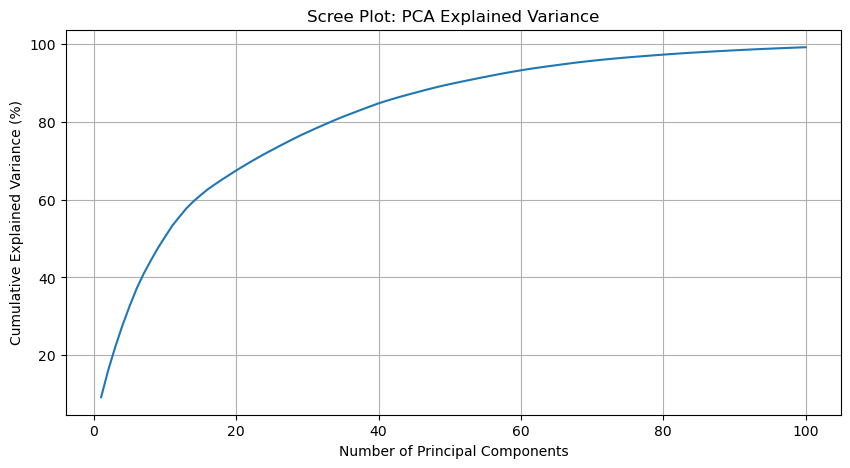

In [7]:
#create a screen plot to visualize variance explained
plt.figure(figsize=(10, 5))  #fig size

#plot cumulative variance explained by each component
plt.plot(
    range(1, len(pca100.explained_variance_ratio_) + 1),  #x-axis: #of components
    np.cumsum(pca100.explained_variance_ratio_) * 100,  #y-axis: Ccmulative variance explained (in %)
)

#formatting
plt.xlabel('Number of Principal Components')  #x-axis label
plt.ylabel('Cumulative Explained Variance (%)')  #y-axis label
plt.title('Scree Plot: PCA Explained Variance')  #title
plt.grid(True)  #grid lines

#print
plt.show()

In [8]:
#define a func to train & eval logistic regression
def train_evaluate_lr(x_train, x_test, y_train, y_test, num_features):
    
    if x_train.shape[0] == 0 or x_test.shape[0] == 0:
        print(f"Error: No data available for training/testing for {num_features} Features!", file=sys.stdout)
        return
          
    model = LogisticRegression(random_state=10, max_iter=5000) #LR model w/fixed randon state & max iter
    model.fit(x_train, y_train) #train model on training data
    y_pred = model.predict(x_test) #pred on test data

    #print report
    print(f"\nClassisfication Report for {num_features} Features:",file=sys.stdout)
    print(classification_report(y_test, y_pred), file=sys.stdout)

In [9]:
#train & eval LR for dif feature dimensions
train_evaluate_lr(x_train_scaled, x_test_scaled, y_train, y_test, "Full (160)") #train & eval for full features
train_evaluate_lr(x_train_pca100, x_test_pca100, y_train, y_test, "PCA (100)") #train & eval for 100 comp
train_evaluate_lr(x_train_pca30, x_test_pca30, y_train, y_test, "PCA (30)") #train & eval for 30 comp
train_evaluate_lr(x_train_pca10, x_test_pca10, y_train, y_test, "PCA (10)") #train & eval for 10 comp


Classisfication Report for Full (160) Features:
              precision    recall  f1-score   support

           0       0.78      0.44      0.56       766
           1       0.99      1.00      1.00     55751

    accuracy                           0.99     56517
   macro avg       0.89      0.72      0.78     56517
weighted avg       0.99      0.99      0.99     56517


Classisfication Report for PCA (100) Features:
              precision    recall  f1-score   support

           0       0.21      0.02      0.04       766
           1       0.99      1.00      0.99     55751

    accuracy                           0.99     56517
   macro avg       0.60      0.51      0.52     56517
weighted avg       0.98      0.99      0.98     56517


Classisfication Report for PCA (30) Features:
              precision    recall  f1-score   support

           0       0.26      0.04      0.07       766
           1       0.99      1.00      0.99     55751

    accuracy                          

/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
#define a func to plot ROC curves
def plot_roc_curve(model, x_test, y_test, num_features):
    
    y_probs = model.predict_proba(x_test)[:,1 ]#get predicted probabilities
    fpr, tpr, _ = roc_curve(y_test, y_probs) #compute false + rate, true + rate & thresholds
    roc_auc = auc(fpr, tpr) #compute area under the curve
    plt.plot(fpr, tpr, lw=2, label=f"{num_features} (AUC = {roc_auc:.2f})")
    return roc_auc #return AUC for later comparison

In [11]:
#train LR models for each dataset
model160 = LogisticRegression(random_state=4, max_iter=10000).fit(x_train_scaled, y_train)
model100 = LogisticRegression(random_state=4, max_iter=10000).fit(x_train_pca100, y_train)
model30 = LogisticRegression(random_state=4, max_iter=10000).fit(x_train_pca30, y_train)
model10 = LogisticRegression(random_state=4, max_iter=10000).fit(x_train_pca10, y_train)

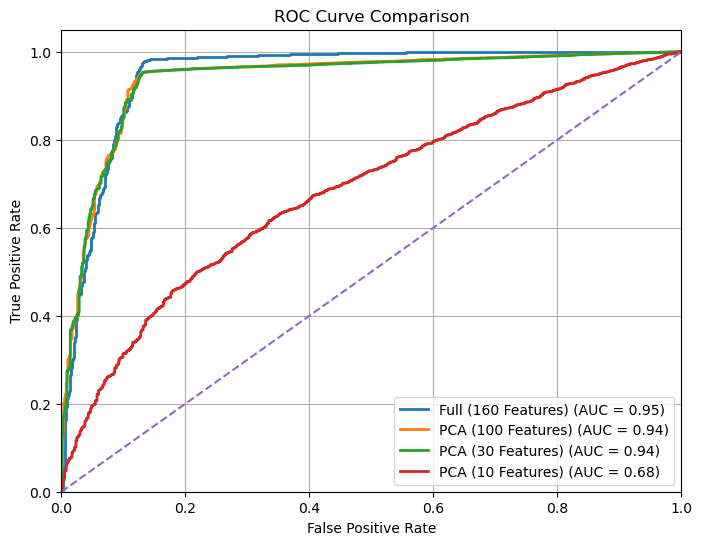

AUC Scores:
Full (160 Features): 0.95
PCA (100 Features): 0.94
PCA (30 Features): 0.94
PCA (10 Features): 0.68


In [12]:
#plot all ROC curves on the same graph
#create a figure for the ROC curve
plt.figure(figsize=(8, 6))

#plot ROC curves for each model
auc160 = plot_roc_curve(model160, x_test_scaled, y_test, "Full (160 Features)")
auc100 = plot_roc_curve(model100, x_test_pca100, y_test, "PCA (100 Features)")
auc30 = plot_roc_curve(model30, x_test_pca30, y_test, "PCA (30 Features)")
auc10 = plot_roc_curve(model10, x_test_pca10, y_test, "PCA (10 Features)")

#plot diagonal line 
plt.plot([0, 1], [0, 1], linestyle='--')

#formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#print AUC values for each model
print(f"AUC Scores:")
print(f"Full (160 Features): {auc160:.2f}")
print(f"PCA (100 Features): {auc100:.2f}")
print(f"PCA (30 Features): {auc30:.2f}")
print(f"PCA (10 Features): {auc10:.2f}")
